# Function Testing Notebook - Matrix Difference Plot

This notebook is meant to test external-facing functions to ensure they are working as expected.

A dedicated test_all_functions.py with unit testing might be better, but this is a good benchmark

In [1]:
import os
import sys
from pathlib import Path
import time
import tempfile
import logging

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mne
from dask_jobqueue import SLURMCluster
from dask.distributed import Client, LocalCluster

In [2]:
# packageroot = Path('../../').resolve()
packageroot = Path('/home/dongjp/source-code/PyEEG').resolve()
print(packageroot)
sys.path.append(str(packageroot))

from pythoneeg import core
from pythoneeg import visualization
from pythoneeg import constants

print(core.__all__)
# print(visualization.__all__)
# print(dir(constants))

/home/dongjp/source-code/PyEEG


/home/dongjp/source-code/PyEEG/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['DDFBinaryMetadata', 'LongRecordingOrganizer', 'convert_ddfcolbin_to_ddfrowbin', 'convert_ddfrowbin_to_si', 'convert_units_to_multiplier', 'convert_colpath_to_rowpath', 'filepath_to_index', 'is_day', 'set_temp_directory', 'get_temp_directory', 'parse_path_to_animalday', 'parse_path_to_genotype', 'parse_path_to_animal', 'parse_path_to_day', 'parse_chname_to_abbrev', 'nanaverage', 'LongRecordingAnalyzer', 'MountainSortAnalyzer', 'FragmentAnalyzer']


In [3]:
core.set_temp_directory('/scr1/users/dongjp')

## Test WAR

In [4]:
logging.basicConfig(format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG, stream=sys.stdout, force=True)
logger = logging.getLogger()

In [5]:
wars = []
animal_ids = ['A10', 'F22']
for animal_id in animal_ids:
    # REVIEW consider making this process a single one-line function
    war = visualization.WindowAnalysisResult.load_pickle_and_json(Path(f'./test-wars/{animal_id}').resolve())
    war = war.filter_all()
    wars.append(war)

    sars = []
    for path in Path('./test-sars/').glob(f'*{animal_id}*'):
        sars.append(visualization.SpikeAnalysisResult.load_fif_and_json(path))
    war.read_sars_spikes(sars, read_mode='mne')

ep = visualization.ExperimentPlotter(wars)


2025-04-08 22:25:35,169 - WARNING - Intan Input (1)/PortC C-009 does not match name aliases. Assuming alias from number in channel name.
2025-04-08 22:25:35,170 - WARNING - Intan Input (1)/PortC C-010 does not match name aliases. Assuming alias from number in channel name.
2025-04-08 22:25:35,170 - WARNING - Intan Input (1)/PortC C-012 does not match name aliases. Assuming alias from number in channel name.
2025-04-08 22:25:35,171 - WARNING - Intan Input (1)/PortC C-014 does not match name aliases. Assuming alias from number in channel name.
2025-04-08 22:25:35,171 - WARNING - Intan Input (1)/PortC C-015 does not match name aliases. Assuming alias from number in channel name.
2025-04-08 22:25:35,172 - WARNING - Intan Input (1)/PortC C-016 does not match name aliases. Assuming alias from number in channel name.
2025-04-08 22:25:35,174 - WARNING - Intan Input (1)/PortC C-017 does not match name aliases. Assuming alias from number in channel name.
2025-04-08 22:25:35,174 - WARNING - Intan

In [6]:
for feat in constants.LINEAR_FEATURE:
    logging.info(f'pulling {feat}')
    ep.pull_timeseries_dataframe(feat, ['genotype','animalday'])

df2 = ep.pull_timeseries_dataframe('rms', ['genotype','animal'], collapse_channels=True)

2025-04-08 22:25:35,433 - INFO - pulling rms
2025-04-08 22:25:35,449 - DEBUG - groups: [('KO', 'A10 KO Dec-13-2023'), ('KO', 'F22 KO Dec-12-2023')]
2025-04-08 22:25:35,450 - DEBUG - vals.shape: (31, 10)
2025-04-08 22:25:35,452 - DEBUG - vals.shape: (117, 10)
2025-04-08 22:25:35,467 - INFO - pulling ampvar
2025-04-08 22:25:35,469 - DEBUG - groups: [('KO', 'A10 KO Dec-13-2023'), ('KO', 'F22 KO Dec-12-2023')]
2025-04-08 22:25:35,471 - DEBUG - vals.shape: (31, 10)
2025-04-08 22:25:35,473 - DEBUG - vals.shape: (117, 10)
2025-04-08 22:25:35,479 - INFO - pulling psdtotal
2025-04-08 22:25:35,481 - DEBUG - groups: [('KO', 'A10 KO Dec-13-2023'), ('KO', 'F22 KO Dec-12-2023')]
2025-04-08 22:25:35,482 - DEBUG - vals.shape: (31, 10)
2025-04-08 22:25:35,484 - DEBUG - vals.shape: (117, 10)
2025-04-08 22:25:35,491 - INFO - pulling psdslope
2025-04-08 22:25:35,494 - DEBUG - groups: [('KO', 'A10 KO Dec-13-2023'), ('KO', 'F22 KO Dec-12-2023')]
2025-04-08 22:25:35,494 - DEBUG - vals.shape: (31, 10, 2)
2025

/home/dongjp/source-code/PyEEG/pythoneeg/visualization/plotting/experiment.py:140: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)
/home/dongjp/source-code/PyEEG/pythoneeg/visualization/plotting/experiment.py:140: RuntimeWarning: Mean of empty slice
  vals = np.nanmean(vals, axis=1)


2025-04-08 22:25:35,577 - DEBUG - groups: ['A10', 'F22']
2025-04-08 22:25:35,581 - DEBUG - vals.shape: (31, 10, 5)
2025-04-08 22:25:35,584 - DEBUG - vals.shape: (117, 10, 5)
2025-04-08 22:25:35,630 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-04-08 22:25:35,634 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-04-08 22:25:35,638 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2025-04-08 22:25:35,639 - DEBUG - findfont: score(FontEntry(fname='/home/dongjp/source-code/PyEEG/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2025-04-08 22:25:35,639 - DEBUG - findfont: score(FontEntry(fname='/home/dongjp/source-code/PyEEG/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-I

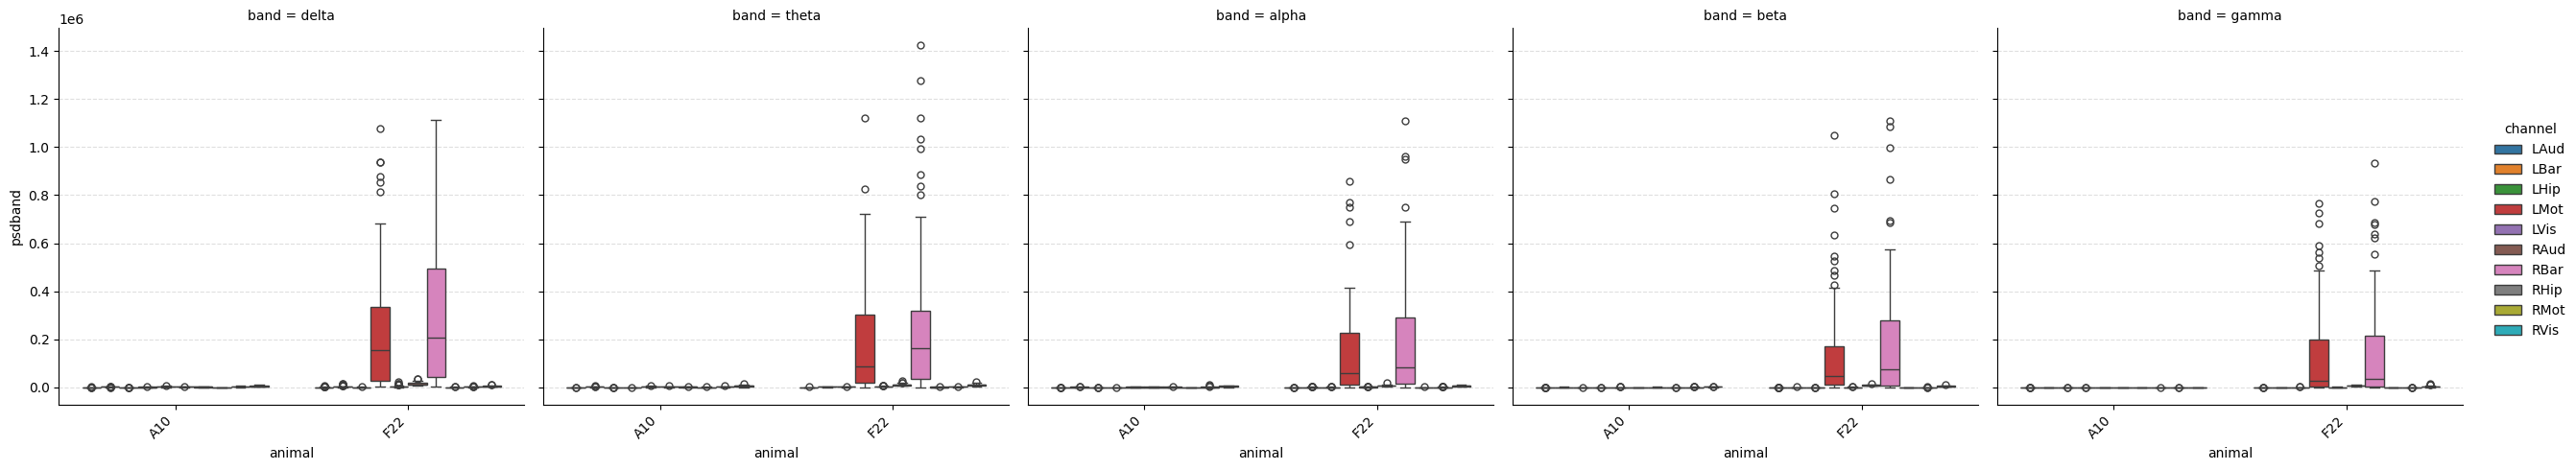

In [7]:
g = ep.plot_catplot('psdband', ['animal'], 
                    collapse_channels=False, hue='channel', col='band',
                    # stat_pairs='x',
                    # stat_pairs=[[('A10 KO Dec-13-2023', 'theta'), ('F22 KO Dec-12-2023', 'delta')]],
                    # stat_pairs=[[('F22', 'delta'), ('F22', 'theta')], [('F22', 'theta'), ('A10', 'theta')]], 
                    # stat_pairs=[[('F22', 'delta'), ('F22', 'theta')], [('F22', 'theta'), ('A10', 'theta')]], 
                    # stat_pairs=perms,
                    # stat_test='Brunner-Munzel',
                    # norm_test='log-D-Agostino',
                    )

In [8]:
ep.plot_matrixdiffplot('cohere', 'animalday', baseline='A10 KO Dec-13-2023')

2025-04-08 22:25:37,820 - DEBUG - groups: ['A10 KO Dec-13-2023', 'F22 KO Dec-12-2023']
2025-04-08 22:25:37,826 - DEBUG - vals.shape: (31, 5, 10, 10)
2025-04-08 22:25:37,827 - DEBUG - vals.shape: (31, 5, 10, 10)
2025-04-08 22:25:37,833 - DEBUG - vals.shape: (117, 5, 10, 10)
2025-04-08 22:25:37,835 - DEBUG - vals.shape: (117, 5, 10, 10)


KeyError: "Columns not found: 'A10 KO Dec-13-2023'"